In [97]:
from fastai.vision.all import *

from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import notebook

PATH = Path('../input/optiver-realized-volatility-prediction/')

In [98]:
train = pd.read_csv(PATH/'train.csv')
train.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [99]:
list_stocks = train.stock_id.unique().tolist()

In [100]:
book_01_df = pd.read_parquet(PATH/'book_train.parquet/stock_id=0')

In [101]:
book_01_df

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28


In [47]:
trade_d_list = []

path = PATH/'trade_train.parquet'

for stock_id in notebook.tqdm(list_stocks):
    df = pd.read_parquet(path/f'stock_id={stock_id}')
    trade_d_list.append((stock_id, df.shape[0], df.price.min(), df.price.max(), df.price.mean(), df.price.var())) 

  0%|          | 0/112 [00:00<?, ?it/s]

In [48]:
path = PATH/'book_train.parquet'

book_d_list=[]
for stock_id in notebook.tqdm(list_stocks):
    df = pd.read_parquet(path/f'stock_id={stock_id}')
    book_d_list.append((stock_id, df.shape[0], df.bid_price1.min(), df.bid_price1.max(), df.bid_price1.mean(), df.bid_price1.var(),
                                               df.bid_price2.min(), df.bid_price2.max(), df.bid_price2.mean(), df.bid_price2.var(),
                                               df.ask_price1.min(), df.ask_price1.max(), df.ask_price1.mean(), df.ask_price1.var(),
                                               df.ask_price2.min(), df.ask_price2.max(), df.ask_price2.mean(), df.ask_price2.var())) 

  0%|          | 0/112 [00:00<?, ?it/s]

In [49]:
book_train_df = pd.DataFrame(book_d_list)
book_train_df.columns = ['stock_id', 'rows', 'min_bid_price1', 'max_bid_price1', 'avg_bid_price1', 'var_bid_price1',
                                             'min_bid_price2', 'max_bid_price2', 'avg_bid_price2', 'var_bid_price2',
                                             'min_ask_price1', 'max_ask_price1', 'avg_ask_price1', 'var_ask_price1',
                                             'min_ask_price2', 'max_ask_price2', 'avg_ask_price2', 'var_ask_price2']
book_train_df.head()

,stock_id,rows,min_bid_price1,max_bid_price1,avg_bid_price1,var_bid_price1,min_bid_price2,max_bid_price2,avg_bid_price2,var_bid_price2,min_ask_price1,max_ask_price1,avg_ask_price1,var_ask_price1,min_ask_price2,max_ask_price2,avg_ask_price2,var_ask_price2
0,0,917553,0.938241,1.045641,0.999495,0.000013,0.937213,1.043756,0.999298,0.000013,0.944337,1.056892,1.000526,0.000014,0.944456,1.057676,1.000727,0.000014
1,1,1507532,0.937472,1.049250,0.999641,0.000019,0.936943,1.049108,0.999472,0.000019,0.938178,1.063606,1.000336,0.000019,0.938354,1.064601,1.000512,0.000019
2,2,1903140,0.960268,1.026796,0.999883,0.000006,0.959092,1.026616,0.999767,0.000006,0.964155,1.029447,1.000147,0.000006,0.964426,1.029980,1.000259,0.000006
3,3,1269461,0.939123,1.062701,0.999376,0.000035,0.938908,1.062567,0.999133,0.000035,0.941841,1.064984,1.000466,0.000035,0.943201,1.067132,1.000725,0.000035
4,4,1073989,0.936748,1.037667,0.999620,0.000011,0.936630,1.037643,0.999484,0.000011,0.952125,1.045408,1.000549,0.000012,0.954082,1.047161,1.000693,0.000012


In [50]:
(251*148 +221*147)/(251+221)

147.53177966101694

In [90]:
book_example = pd.read_parquet('../input/optiver-realized-volatility-prediction/book_train.parquet/stock_id=0')
trade_example =  pd.read_parquet('../input/optiver-realized-volatility-prediction/trade_train.parquet/stock_id=0')
stock_id = '0'
time_id=5
book_example = book_example[book_example['time_id']==time_id]
book_example.loc[:,'stock_id'] = stock_id
trade_example = trade_example[trade_example['time_id']==time_id]
trade_example.loc[:,'stock_id'] = stock_id

In [91]:
book_example['wap'] = (book_example['bid_price1'] * book_example['ask_size1'] +
                                book_example['ask_price1'] * book_example['bid_size1']) / (
                                       book_example['bid_size1']+ book_example['ask_size1'])

In [92]:
book_example

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,wap
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100,0,1.001434
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100,0,1.001448
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100,0,1.001448
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443
...,...,...,...,...,...,...,...,...,...,...,...,...
297,5,585,1.003129,1.003749,1.003025,1.003801,100,3,26,3,0,1.003731
298,5,586,1.003129,1.003749,1.002612,1.003801,100,3,2,3,0,1.003731
299,5,587,1.003129,1.003749,1.003025,1.003801,100,3,26,3,0,1.003731
300,5,588,1.003129,1.003749,1.002612,1.003801,100,3,2,3,0,1.003731


<AxesSubplot:xlabel='seconds_in_bucket'>

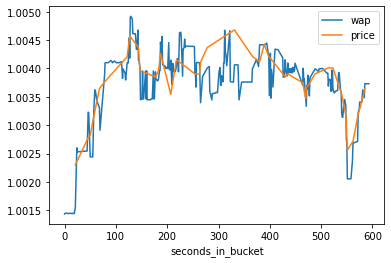

In [93]:
ax = book_example.plot(x='seconds_in_bucket', y='wap')

trade_example.plot(x='seconds_in_bucket', y='price',ax=ax)

In [94]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff() 

book_example.loc[:,'log_return'] = log_return(book_example['wap'])
book_example = book_example[~book_example['log_return'].isnull()]

<AxesSubplot:xlabel='seconds_in_bucket'>

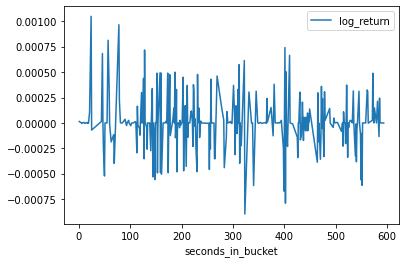

In [95]:
 book_example.plot(x='seconds_in_bucket', y='log_return')

In [96]:
def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))
realized_vol = realized_volatility(book_example['log_return'])
print(f'Realized volatility for stock_id 0 on time_id 5 is {realized_vol}')

Realized volatility for stock_id 0 on time_id 5 is 0.004499364172786558
